In [1]:
import os
import ROOT

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from tqdm import tqdm

from lmfit import minimize, Parameters

# Check if processed direcoty exists, if not create it
if not os.path.exists('processed'):
    os.makedirs('processed')

# Check if plot direcoty exists, if not create it
if not os.path.exists('plot'):
    os.makedirs('plot')

a = 10
b = 175

def trg( x ):
    return 1/( 1 + np.exp( ( b - x )/a ) )

def checkTrg( x ):
   p = trg( x )
   rand = np.random.rand( )
   
   if( rand > p ):
       return True
   else:
       return False

In module 'Darwin':
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/libkern/arm/OSByteOrder.h:14:1: error: '_OSSwapInt16' has different definitions in different modules; definition in module 'Darwin.libkern.OSByteOrder' first difference is return type is 'uint16_t' (aka 'unsigned short')
uint16_t
^~~~~~~~
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/libkern/arm/_OSByteOrder.h:49:1: note: but in 'DarwinFoundation.OSByteOrder' found different return type '__uint16_t' (aka 'unsigned short')
__uint16_t
^~~~~~~~~~
In module 'Darwin':
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/libkern/arm/OSByteOrder.h:24:1: error: '_OSSwapInt32' has different definitions in different modules; definition in module 'Darwin.libkern.OSByteOrder' first difference is return type is 'uint32_t' (aka 'unsigned int')
uint32_t
^~~~~~~~
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/libkern/arm/_OSByteOrder.h:59:1: note: but in 'DarwinFoundation.O

Welcome to JupyROOT 6.30/04


In [2]:
MevToKev = 1e3

def sigma( energy ):
    return np.sqrt( 154 + 843.8 * energy / MevToKev )

def sigma_quenching( energy ):
    return 154 - 0.068 * energy + 1.48E-5 * ( energy )**2
    return ( 0.2 * np.exp( energy / 802 ) + 85 )
    #return np.abs((-0.5  + energy / 1e3 * 0.112) * 1e3 / 2.35

def quenching( energy ):
    return (  2.998 - 0.474 * energy / 1e3 + 0.0969 * ( energy / 1e3 )**2 ) * 1e3
    #return ( 0.159 * np.exp( energy / 2603 ) + 2.0 ) * 1e3
    #return ( 0.270 * np.exp( energy / 3055 ) + 1.70 ) * 1e3

def convert( h1, h2, offset=0 ):

    events_gamma = []
    for i in range(h1.GetNbinsX()):
        content = h1.GetBinContent(i)
        energy = h1.GetBinCenter(i)
        for j in range(int(content)):
            events_gamma.append(energy)

    events_alpha = []
    for i in range(h2.GetNbinsX()):
        content = h2.GetBinContent(i)
        energy = h2.GetBinCenter(i)
        for j in range(int(content)):
            events_alpha.append(energy)

    events1 = [ ]
    events2 = [ ]
    for i in tqdm( range( len( events_gamma ) ) ):
        energy = events_gamma[i] * MevToKev
        evt = np.random.normal( energy, sigma( energy ) )
        if( checkTrg( evt ) ):
            continue
        else:
            events1.append( evt )

    for i in tqdm( range( len( events_alpha ) ) ):
        energy = ( events_alpha[i] + offset )* MevToKev
        energy_q = quenching( energy )
        events2.append( np.random.normal( energy_q, sigma_quenching( energy_q ) ) )

    df_gamma = pd.DataFrame( events1, columns = [ 'Energy' ] )
    df_gamma[ 'Type' ] = 'Gamma'

    df_alpha = pd.DataFrame( events2, columns = [ 'Energy' ] )
    df_alpha[ 'Type' ] = 'Alpha'

    return pd.concat( [ df_gamma, df_alpha ] )

In [3]:
f_40k = ROOT.TFile("../build/output/40K_int.root")
h_40k_a = f_40k.Get("13")
h_40k_g = f_40k.Get("12")
df_40k = convert( h_40k_g, h_40k_a )
f_40k.Close( )
df_40k.to_pickle( "processed/40K.pkl" )

f_210pb = ROOT.TFile("../build/output/210Pb_int.root")
h_210pb_a = f_210pb.Get("13")
h_210pb_g = f_210pb.Get("12")
df_210pb = convert( h_210pb_g, h_210pb_a )
f_210pb.Close( )
df_210pb.to_pickle( "processed/210Pb.pkl" )

f_228th = ROOT.TFile("../build/output/232Th_int.root")
h_228th_a = f_228th.Get("13")
h_228th_g = f_228th.Get("12")
df_228th = convert( h_228th_g, h_228th_a )
f_228th.Close( )
df_228th.to_pickle( "processed/228Th.pkl" )

f_238u = ROOT.TFile("../build/output/238U_int.root")
h_238u_a = f_238u.Get("13")
h_238u_g = f_238u.Get("12")
df_238u = convert( h_238u_g, h_238u_a, offset=0.0 )
f_238u.Close( )
df_238u.to_pickle( "processed/238U.pkl" )

100%|██████████| 296631/296631 [00:00<00:00, 303142.23it/s]
0it [00:00, ?it/s]
/var/folders/13/_3g2lmwx6xl3zshjv1d7yz4c0000gn/T/ipykernel_80934/1234065694.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat( [ df_gamma, df_alpha ] )
100%|██████████| 7999990/7999990 [00:11<00:00, 700752.48it/s]


In [4]:
f_40k = ROOT.TFile("../build/output/40K_ext.root")
h_40k_a = f_40k.Get("13")
h_40k_g = f_40k.Get("12")
df_40k = convert( h_40k_g, h_40k_a )
f_40k.Close( )
df_40k.to_pickle( "processed/40K_ext.pkl" )

f_210pb = ROOT.TFile("../build/output/210Pb_ext.root")
h_210pb_a = f_210pb.Get("13")
h_210pb_g = f_210pb.Get("12")
df_210pb = convert( h_210pb_g, h_210pb_a )
f_210pb.Close( )
df_210pb.to_pickle( "processed/210Pb_ext.pkl" )

f_228th = ROOT.TFile("../build/output/232Th_ext.root")
h_228th_a = f_228th.Get("13")
h_228th_g = f_228th.Get("12")
df_228th = convert( h_228th_g, h_228th_a )
f_228th.Close( )
df_228th.to_pickle( "processed/228Th_ext.pkl" )

f_238u = ROOT.TFile("../build/output/238U_ext.root")
h_238u_a = f_238u.Get("13")
h_238u_g = f_238u.Get("12")
df_238u = convert( h_238u_g, h_238u_a, offset=0.0 )
f_238u.Close( )
df_238u.to_pickle( "processed/238U_ext.pkl" )

100%|██████████| 265494/265494 [00:00<00:00, 293564.01it/s]
0it [00:00, ?it/s]
/var/folders/13/_3g2lmwx6xl3zshjv1d7yz4c0000gn/T/ipykernel_80934/1234065694.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat( [ df_gamma, df_alpha ] )
100%|██████████| 245/245 [00:00<00:00, 269217.84it/s]
0it [00:00, ?it/s]
/var/folders/13/_3g2lmwx6xl3zshjv1d7yz4c0000gn/T/ipykernel_80934/1234065694.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat( [ df_gamma, df_alpha ] )
100%

In [5]:
# Load the observed data and simulation datasets
observed_data_alpha = pd.read_pickle( "data/energy_alpha.pkl" )
observed_data_gamma = pd.read_pickle( "data/energy_gamma.pkl" )
simulation_data_40k = pd.read_pickle( "processed/40K.pkl" )
simulation_data_210pb = pd.read_pickle( "processed/210Pb.pkl" )
simulation_data_228th = pd.read_pickle( "processed/228Th.pkl" )
simulation_data_238u = pd.read_pickle( "processed/238U.pkl" )
simulation_data_40k_ext = pd.read_pickle( "processed/40K_ext.pkl" )
simulation_data_210pb_ext = pd.read_pickle( "processed/210Pb_ext.pkl" )
simulation_data_228th_ext = pd.read_pickle( "processed/228Th_ext.pkl" )
simulation_data_238u_ext = pd.read_pickle( "processed/238U_ext.pkl" )

# Mask alpha particles
simulation_data_40k_gamma = simulation_data_40k[simulation_data_40k["Type"] == "Gamma"]
simulation_data_210pb_gamma = simulation_data_210pb[simulation_data_210pb["Type"] == "Gamma"]
simulation_data_228th_gamma = simulation_data_228th[simulation_data_228th["Type"] == "Gamma"]
simulation_data_238u_gamma = simulation_data_238u[simulation_data_238u["Type"] == "Gamma"]
simulation_data_40k_ext_gamma = simulation_data_40k_ext[simulation_data_40k_ext["Type"] == "Gamma"]
simulation_data_210pb_ext_gamma = simulation_data_210pb_ext[simulation_data_210pb_ext["Type"] == "Gamma"]
simulation_data_228th_ext_gamma = simulation_data_228th_ext[simulation_data_228th_ext["Type"] == "Gamma"]
simulation_data_238u_ext_gamma = simulation_data_238u_ext[simulation_data_238u_ext["Type"] == "Gamma"]

# Mask the alpha particles
simulation_data_40k_alpha = simulation_data_40k[simulation_data_40k["Type"] == "Alpha"]
simulation_data_210pb_alpha = simulation_data_210pb[simulation_data_210pb["Type"] == "Alpha"]
simulation_data_228th_alpha = simulation_data_228th[simulation_data_228th["Type"] == "Alpha"]
simulation_data_238u_alpha = simulation_data_238u[simulation_data_238u["Type"] == "Alpha"]

# Convert the observed data to numpy arrays
observed_data_alpha = observed_data_alpha.values
observed_data_gamma = observed_data_gamma.values

# Define the observed histogram
counts_observed_alpha, xbins = np.histogram(observed_data_alpha * 0.571 - 37.34, bins=1000, range=(0, 10000))
counts_observed_gamma, xbins = np.histogram(observed_data_gamma * 0.571 - 37.34, bins=1000, range=(0, 10000))

# Define counts for each data with histograms
counts_simulation_40k_gamma, _ = np.histogram(simulation_data_40k_gamma["Energy"], bins=1000, range=(0, 10000))
counts_simulation_210pb_gamma, _ = np.histogram(simulation_data_210pb_gamma["Energy"], bins=1000, range=(0, 10000))
counts_simulation_228th_gamma, _ = np.histogram(simulation_data_228th_gamma["Energy"], bins=1000, range=(0, 10000))
counts_simulation_238u_gamma, _ = np.histogram(simulation_data_238u_gamma["Energy"], bins=1000, range=(0, 10000))
counts_simulation_40k_ext_gamma, _ = np.histogram(simulation_data_40k_ext_gamma["Energy"], bins=1000, range=(0, 10000))
counts_simulation_210pb_ext_gamma, _ = np.histogram(simulation_data_210pb_ext_gamma["Energy"], bins=1000, range=(0, 10000))
counts_simulation_228th_ext_gamma, _ = np.histogram(simulation_data_228th_ext_gamma["Energy"], bins=1000, range=(0, 10000))
counts_simulation_238u_ext_gamma, _ = np.histogram(simulation_data_238u_ext_gamma["Energy"], bins=1000, range=(0, 10000))

# Define counts for each data with histograms
counts_simulation_40k_alpha, _ = np.histogram(simulation_data_40k_alpha["Energy"], bins=1000, range=(0, 10000))
counts_simulation_210pb_alpha, _ = np.histogram(simulation_data_210pb_alpha["Energy"], bins=1000, range=(0, 10000))
counts_simulation_228th_alpha, _ = np.histogram(simulation_data_228th_alpha["Energy"], bins=1000, range=(0, 10000))
counts_simulation_238u_alpha, _ = np.histogram(simulation_data_238u_alpha["Energy"], bins=1000, range=(0, 10000))

# Add it to the dataframes
observed_data_alpha = pd.DataFrame({"Bins": xbins[:-1], "Counts": counts_observed_alpha})
observed_data_gamma = pd.DataFrame({"Bins": xbins[:-1], "Counts": counts_observed_gamma})
simulation_data_40k_gamma = pd.DataFrame({"Bins": xbins[:-1], "Counts": counts_simulation_40k_gamma})
simulation_data_210pb_gamma = pd.DataFrame({"Bins": xbins[:-1], "Counts": counts_simulation_210pb_gamma})
simulation_data_228th_gamma = pd.DataFrame({"Bins": xbins[:-1], "Counts": counts_simulation_228th_gamma})
simulation_data_238u_gamma = pd.DataFrame({"Bins": xbins[:-1], "Counts": counts_simulation_238u_gamma})
simulation_data_40k_alpha = pd.DataFrame({"Bins": xbins[:-1], "Counts": counts_simulation_40k_alpha})
simulation_data_210pb_alpha = pd.DataFrame({"Bins": xbins[:-1], "Counts": counts_simulation_210pb_alpha})
simulation_data_228th_alpha = pd.DataFrame({"Bins": xbins[:-1], "Counts": counts_simulation_228th_alpha})
simulation_data_238u_alpha = pd.DataFrame({"Bins": xbins[:-1], "Counts": counts_simulation_238u_alpha})
simulation_data_40k_ext_gamma = pd.DataFrame({"Bins": xbins[:-1], "Counts": counts_simulation_40k_ext_gamma})
simulation_data_210pb_ext_gamma = pd.DataFrame({"Bins": xbins[:-1], "Counts": counts_simulation_210pb_ext_gamma})
simulation_data_228th_ext_gamma = pd.DataFrame({"Bins": xbins[:-1], "Counts": counts_simulation_228th_ext_gamma})
simulation_data_238u_ext_gamma = pd.DataFrame({"Bins": xbins[:-1], "Counts": counts_simulation_238u_ext_gamma})

# Save the spectra to CSV
#observed_data.to_csv( "gianluca/observed.csv" )
#simulation_data_40k_gamma.to_csv( "gianluca/40K_gamma.csv" )
#simulation_data_210pb_gamma.to_csv( "gianluca/210Pb_gamma.csv" )
#simulation_data_228th_gamma.to_csv( "gianluca/228Th_gamma.csv" )
#simulation_data_238u_gamma.to_csv( "gianluca/238U_gamma.csv" )
#simulation_data_40k_alpha.to_csv( "gianluca/40K_alpha.csv" )
#simulation_data_210pb_alpha.to_csv( "gianluca/210Pb_alpha.csv" )
#simulation_data_228th_alpha.to_csv( "gianluca/228Th_alpha.csv" )
#simulation_data_238u_alpha.to_csv( "gianluca/238U_alpha.csv" )

In [6]:
norm = 1 #17.759 # days

# Convert to seconds
#norm = norm * 24 * 60 * 60

# Prepare the data
mask = (observed_data_alpha["Counts"] > 0)
data = observed_data_alpha["Counts"][mask]

# Prepare the simulation data
sim_pb = simulation_data_210pb_alpha["Counts"][mask]
sim_th = simulation_data_228th_alpha["Counts"][mask]
sim_u = simulation_data_238u_alpha["Counts"][mask]

# Prepare the model
def model(params):
    expected_counts_alpha = params["Pb"] * sim_pb + params["Th"] * sim_th + params["U"] * sim_u
    return expected_counts_alpha

# Define the function to minimize
def func(params, data):
    mod = model(params)
    obs, err = data, np.sqrt(data)
    chi2 = (obs - mod) / err
    return chi2

# Prepare parameters
params = Parameters()

params.add("Pb", value=0.05, min=0.0, max=1.0)
params.add("Th", value=0.05, min=0.0, max=1.0)
params.add("U", value=0.001, min=0.0, max=1.0)

# Perform the minimization
result = minimize(func, params, args=(data, ))

# Print parameters and uncertainties
for param in result.params:
    print(f"{param} = {result.params[param].value} +/- {result.params[param].stderr}")

# Get the reduced chi2
chi2 = np.sum(result.residual ** 2) / (len(data) - 3)

best_params = result.params.copy()

print(f"Reduced chi2 = {chi2}")

mod = result.params["Pb"].value * simulation_data_210pb_alpha["Counts"] + result.params["Th"].value * simulation_data_228th_alpha["Counts"] + result.params["U"].value * simulation_data_238u_alpha["Counts"]


Pb = 0.03961675201765258 +/- 0.0006382765218016699
Th = 0.0002789707866744928 +/- 3.667532500138456e-05
U = 0.0012840676153709762 +/- 5.053140798635626e-05
Reduced chi2 = 9.127971780337614


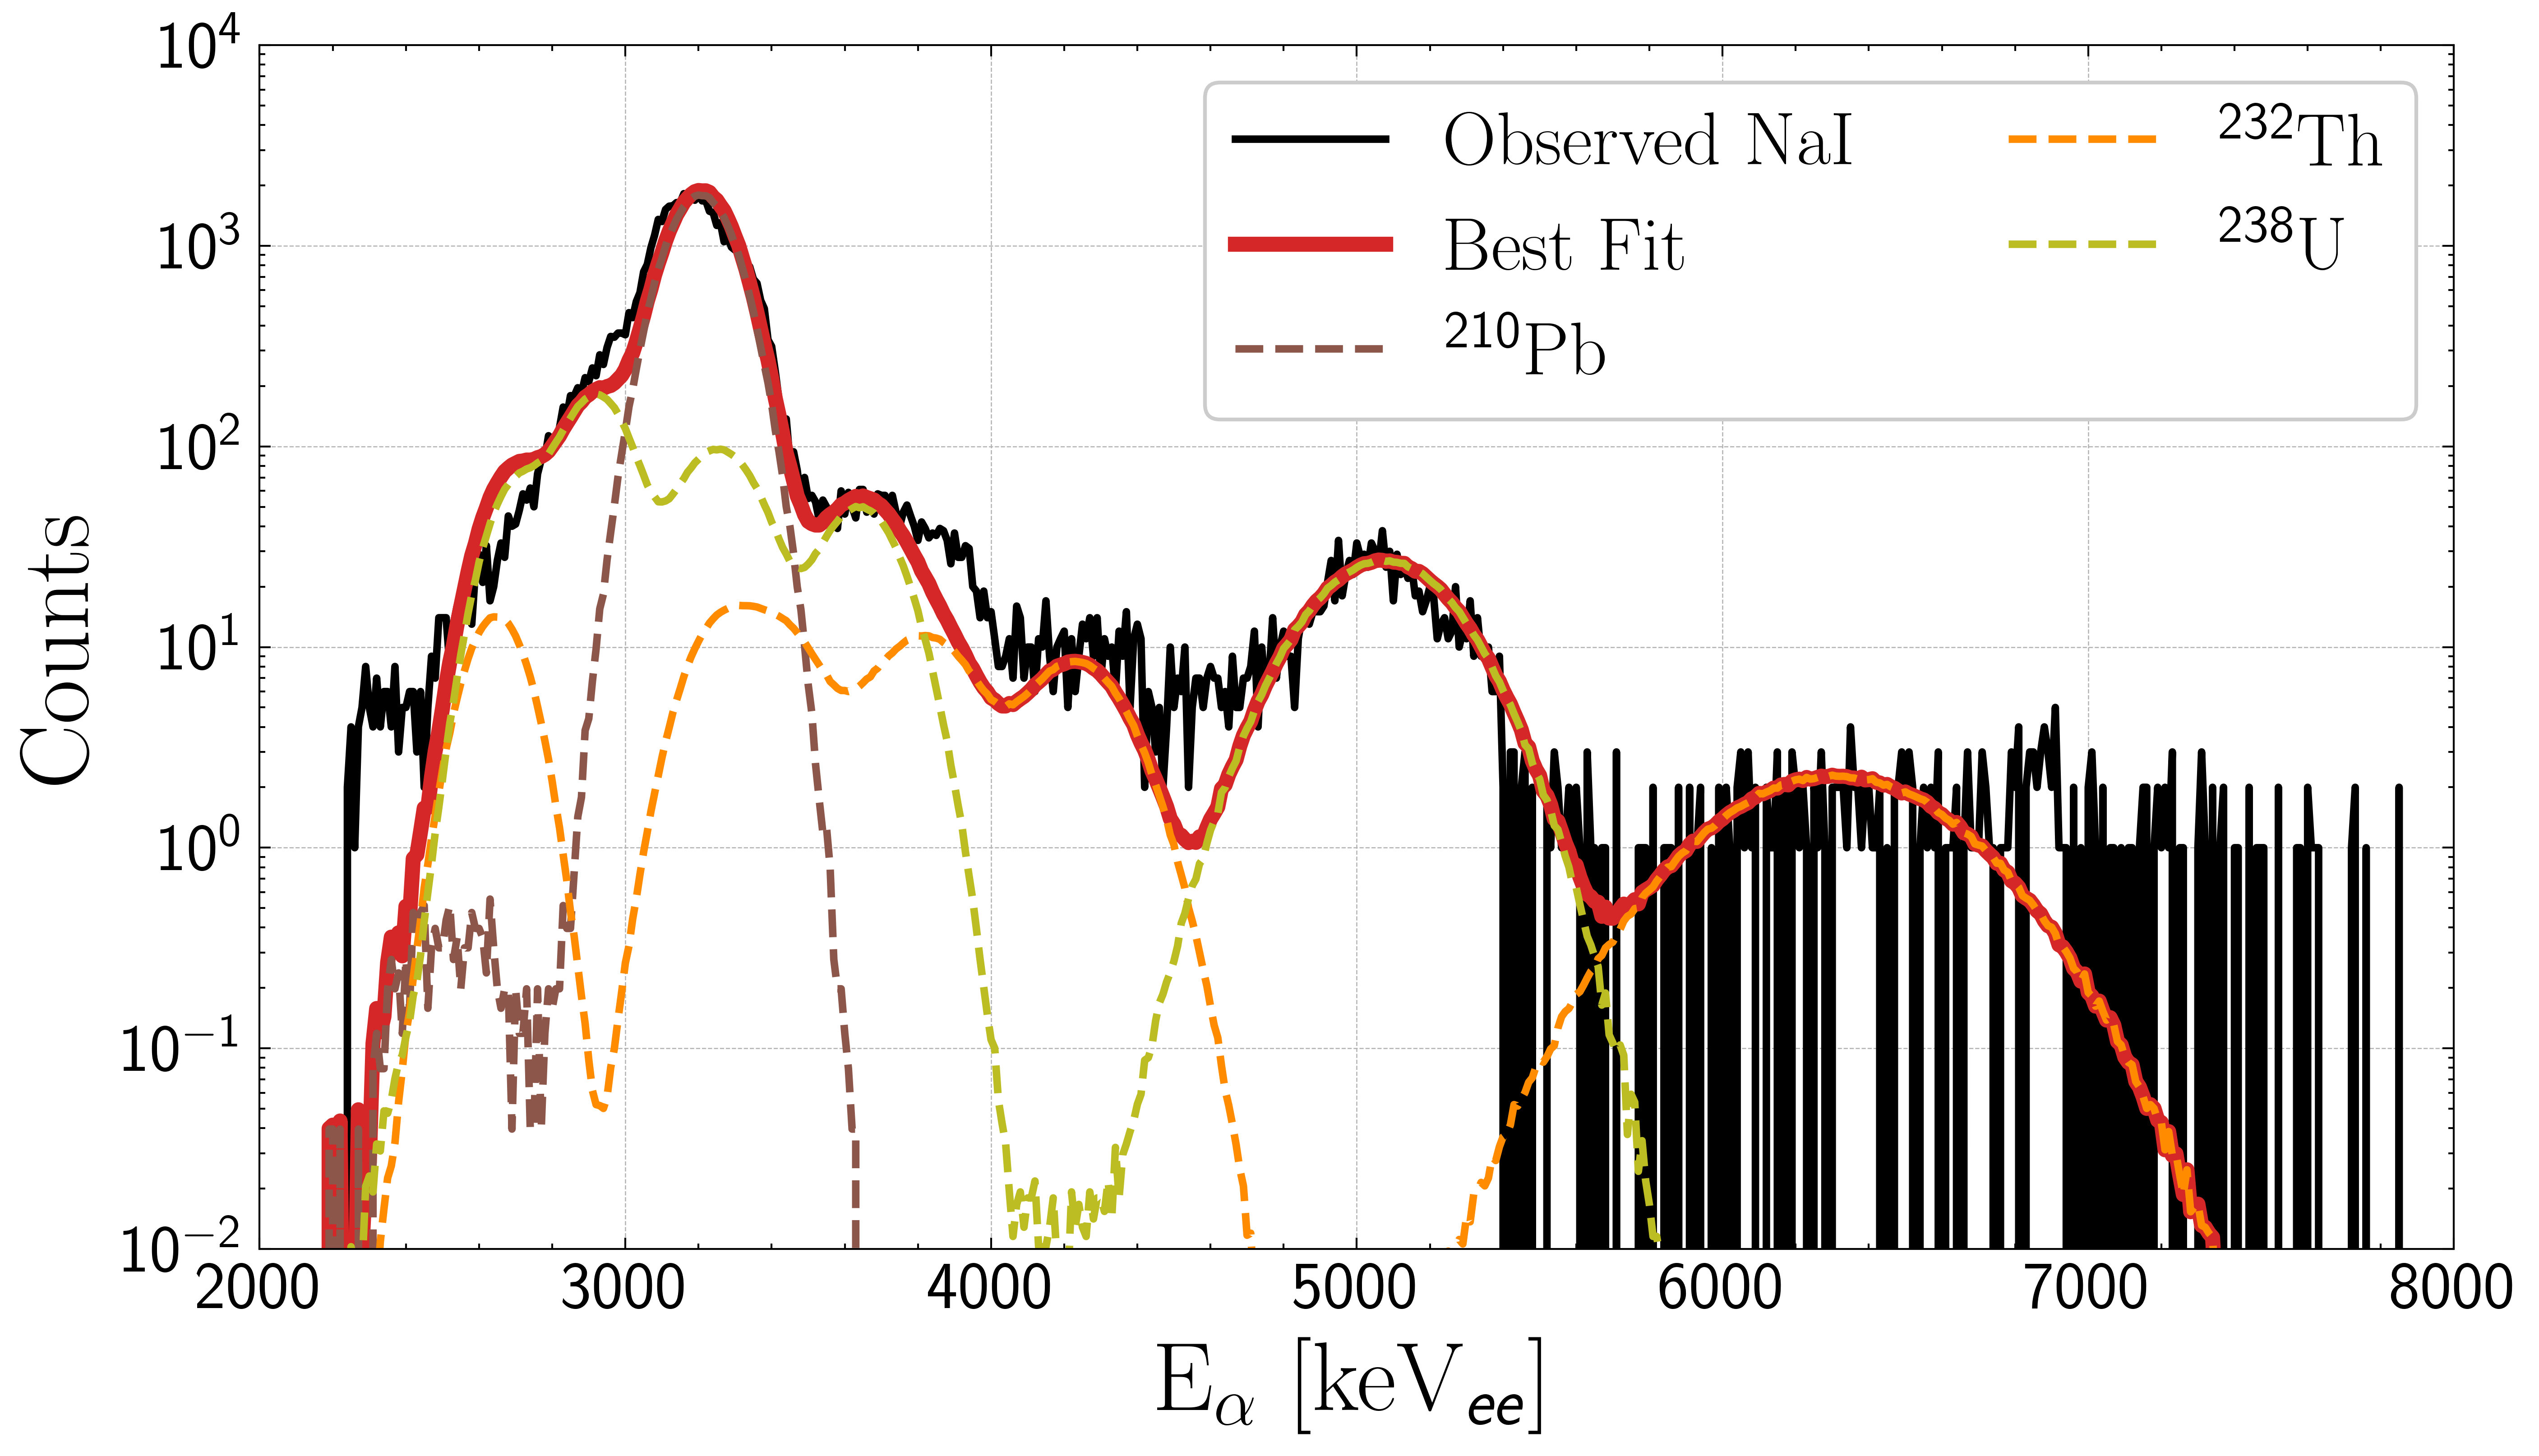

In [7]:
#plt.style.use('default')
#Load stylesheet from file
plt.style.use('style/rg_style.mplstyle')

# Make defaults
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = 'Computer Modern'
#plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 26
plt.rcParams['axes.labelsize'] = 26
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 24

mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

# Plot
plt.figure(figsize=(10, 6))

#result.x[4] = 2 * result.x[4]

# Plot the observed and expected data
plt.plot(observed_data_alpha["Bins"], observed_data_alpha["Counts"] / norm, label="Observed NaI", color="black", lw=2)
#plt.errorbar(observed_data_alpha["Bins"], observed_data_alpha["Counts"], yerr=np.sqrt(observed_data_alpha["Counts"]), fmt='o', label="Observed NaI", color="black", lw=2)
plt.plot(observed_data_alpha["Bins"], mod / norm, label="Best Fit", color="tab:red", lw=4)

plt.plot(simulation_data_210pb_alpha["Bins"], result.params["Pb"] * simulation_data_210pb_alpha["Counts"] / norm, color="tab:brown", label=r"$^{210}$Pb", ls='--', lw=2)
plt.plot(simulation_data_228th_alpha["Bins"], result.params["Th"] * simulation_data_228th_alpha["Counts"] / norm, color="darkorange", label=r"$^{232}$Th",  ls='--', lw=2)
plt.plot(simulation_data_238u_alpha["Bins"], result.params["U"] * simulation_data_238u_alpha["Counts"] / norm, color="tab:olive", label=r"$^{238}$U",  ls='--', lw=2)

plt.xlabel(r"E$_{\alpha}$ [keV$_{ee}$]")
plt.ylabel("Counts")

plt.yscale("log")

plt.legend(ncol=2)

plt.xlim(2000, 8000)
plt.ylim(0.01 / norm, 1e4 / norm)

#plt.title( r"NaI $\alpha$-particle Spectrum")

# Make the font helvetica

plt.tight_layout()

plt.savefig( "plot/NaI_alpha_Fit.pdf" )
plt.show()

In [5]:
# Prepare the data
mask = (observed_data_gamma["Counts"] > 0)
data = observed_data_gamma["Counts"][mask]

# Prepare the simulation data
sim_pb = simulation_data_210pb_gamma["Counts"][mask]
sim_th = simulation_data_228th_gamma["Counts"][mask]
sim_u = simulation_data_238u_gamma["Counts"][mask]
sim_k = simulation_data_40k_gamma["Counts"][mask]
sim_k_ext = simulation_data_40k_ext_gamma["Counts"][mask]
sim_th_ext = simulation_data_228th_ext_gamma["Counts"][mask]
sim_pb_ext = simulation_data_210pb_ext_gamma["Counts"][mask]
sim_u_ext = simulation_data_238u_ext_gamma["Counts"][mask]

# Prepare the model
def model(params):
    counts = params["Pb_ext"] * sim_pb + params["Th_ext"] * sim_th + params["U_ext"] * sim_u + params["K_ext"] * sim_k + params["K"] * sim_k_ext + params["Th"] * sim_th_ext + params["Pb"] * sim_pb_ext + params["U"] * sim_u_ext
    return counts

# Define the function to minimize
def func(params, data):
    mod = model(params)
    obs, err = data, np.sqrt(data)
    chi2 = (obs - mod) / err
    return chi2[15:]

# Prepare parameters
params.add("Pb", value=1.00, min=0.0)
params.add("Th", value=1.00, min=0.0)
params.add("U", value=1.00, min=0.0)
params.add("K", value=1.00, min=0.0)
params.add("Pb_ext", value=best_params["Pb"], min=0.0, vary=True)
params.add("Th_ext", value=best_params["Th"], min=0.0, vary=False)
params.add("U_ext", value=best_params["U"], min=0.0, vary=False)
params.add("K_ext", value=1, min=0.0, vary=True)

# Perform the minimization
result = minimize(func, params, args=(data, ))

# Print parameters and uncertainties
for param in result.params:
    print(f"{param} = {result.params[param].value} +/- {result.params[param].stderr}")

# Get the reduced chi2
chi2 = np.sum(result.residual ** 2) / (len(data) - 3)

print(f"Reduced chi2 = {chi2}")

mod = result.params["Pb_ext"].value * simulation_data_210pb_gamma["Counts"] + result.params["Th_ext"].value * simulation_data_228th_gamma["Counts"] + result.params["U_ext"].value * simulation_data_238u_gamma["Counts"] + result.params["K_ext"].value * simulation_data_40k_gamma["Counts"] + result.params["K"].value * simulation_data_40k_ext_gamma["Counts"] + result.params["Th"].value * simulation_data_228th_ext_gamma["Counts"] + result.params["Pb"].value * simulation_data_210pb_ext_gamma["Counts"] + result.params["U"].value * simulation_data_238u_ext_gamma["Counts"]


Pb = 1995.9924201942185 +/- 263.15050473193213
Th = 1.0510129606930092 +/- 0.0825597938875749
U = 0.6252453509912546 +/- 0.1346016012096095
K = 1.9645426747717338 +/- 0.6251406634974433
Pb_ext = 117.5400855539672 +/- 2.5235971204900234
Th_ext = <Parameter 'Th', value=0.00028001121438242516 +/- 3.65e-05, bounds=[0.0:1.0]> +/- 0
U_ext = <Parameter 'U', value=0.001284759097314181 +/- 5.02e-05, bounds=[0.0:1.0]> +/- 0
K_ext = 8.978773280432506e-11 +/- 0.2193072929097612
Reduced chi2 = 261.10151597888165


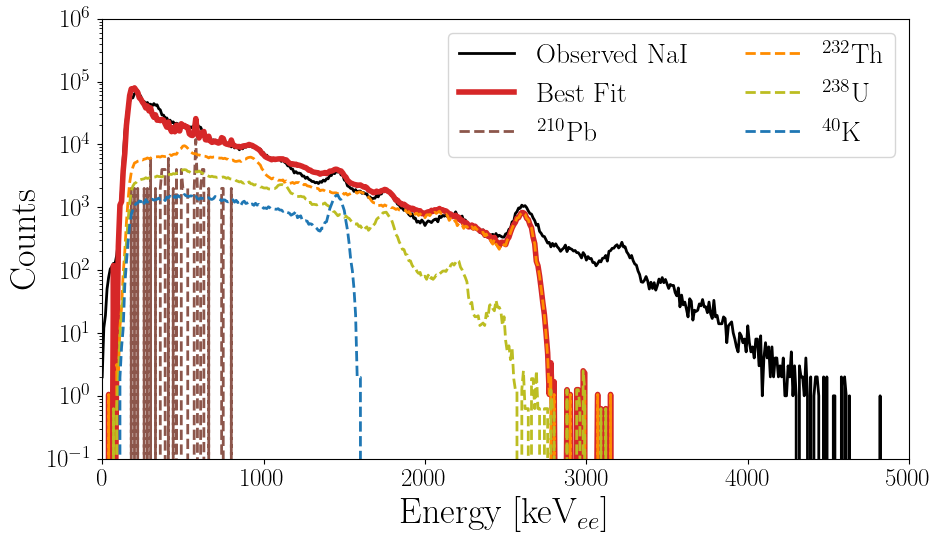

In [8]:
plt.style.use('default')

# Make defaults
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 26
plt.rcParams['axes.labelsize'] = 26
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 24

mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

# Plot
plt.figure(figsize=(10, 6))

# Plot the observed and expected data
plt.plot(observed_data_gamma["Bins"], observed_data_gamma["Counts"], label="Observed NaI", color="black", lw=2)
plt.plot(observed_data_gamma["Bins"], mod, label="Best Fit", color="tab:red", lw=4)

#plt.plot(simulation_data_210pb_gamma["Bins"], result.params["Pb_ext"] * simulation_data_210pb_gamma["Counts"], color="tab:brown", label=r"$^{210}$Pb", ls='--', lw=2)
#plt.plot(simulation_data_228th_gamma["Bins"], result.params["Th_ext"] * simulation_data_228th_gamma["Counts"], color="darkorange", label=r"$^{232}$Th",  ls='--', lw=2)
#plt.plot(simulation_data_238u_gamma["Bins"], result.params["U_ext"] * simulation_data_238u_gamma["Counts"], color="tab:olive", label=r"$^{238}$U",  ls='--', lw=2)
#plt.plot(simulation_data_40k_gamma["Bins"], result.params["K_ext"] * simulation_data_40k_gamma["Counts"], color="tab:blue", label=r"$^{40}$K",  ls='--', lw=2)

# Plot the external data with other line style
plt.plot(simulation_data_210pb_ext_gamma["Bins"], result.params["Pb"] * simulation_data_210pb_ext_gamma["Counts"], color="tab:brown", ls='--', lw=2, label=r"$^{210}$Pb" )
plt.plot(simulation_data_228th_ext_gamma["Bins"], result.params["Th"] * simulation_data_228th_ext_gamma["Counts"], color="darkorange", ls='--', lw=2, label=r"$^{232}$Th" )
plt.plot(simulation_data_238u_ext_gamma["Bins"], result.params["U"] * simulation_data_238u_ext_gamma["Counts"], color="tab:olive", ls='--', lw=2, label=r"$^{238}$U" )
plt.plot(simulation_data_40k_ext_gamma["Bins"], result.params["K"] * simulation_data_40k_ext_gamma["Counts"], color="tab:blue", ls='--', lw=2, label=r"$^{40}$K" )

plt.xlabel(r"Energy [keV$_{ee}$]")
plt.ylabel("Counts")

plt.yscale("log")

plt.legend(ncol=2)

plt.xlim(0, 5000)
plt.ylim(0.1, 1e6)

plt.tight_layout()

plt.savefig( "plot/NaI_gamma_Fit.pdf" )
plt.show()